In [1]:
import numpy as np
import torch
from matplotlib.font_manager import FontProperties
from sklearn.preprocessing import MinMaxScaler
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
n_dots = 500
x1 = torch.linspace(-2, 2, n_dots).view(-1, 1)
x2 = torch.linspace(-2, 2, n_dots).view(-1, 1)
y_data = (1 + torch.sin(2* x1 + 3 * x2))/(3.5 + torch.sin(x1 -x2)) + 0.1 * torch.randn(x1.size())
x_data = torch.cat((x1, x2), -1)

train_set_input, test_set_input, train_set_output, test_set_output = train_test_split(x_data, y_data, test_size=0.2,shuffle=True)

In [3]:
# 超参数
learning_rate = [0.0003, 0.003, 0.03, 0.3]
neure = 5

In [4]:
loss_list = []
for lr in learning_rate:
    net = nn.Sequential(
        nn.Linear(2, neure),
        nn.ReLU(),
        nn.Linear(neure, 1),
        nn.Sigmoid(),
    )

    # 3 定义优化器和损失函数
    loss = nn.MSELoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=lr) 

    # 4 训练网络
    max_epoch = 500
    mse_loss = []
    for i in range(max_epoch):
        predict = net(torch.FloatTensor(train_set_input))
        l = loss(torch.FloatTensor(train_set_output), predict)
        optimizer.zero_grad()    
        l.backward()
        optimizer.step()
        mse_loss.append(l.item())
    loss_list.append(l.item())

In [5]:
loss_list

[0.10710915923118591,
 0.051809415221214294,
 0.047570157796144485,
 0.04602468013763428]

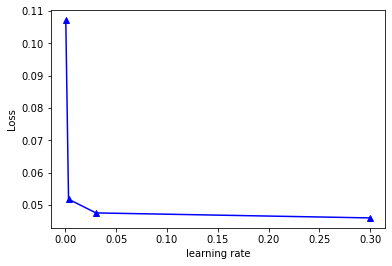

In [7]:
plt.plot(learning_rate, loss_list, 'b^', learning_rate, loss_list, 'b')
plt.ylabel('Loss')
plt.xlabel('learning rate')
plt.savefig('../../期末作业/figures/学习率.png', dpi=900)